<h1><b><p style="background-image: url(https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.simplilearn.com%2Fdata-science-vs-big-data-vs-data-analytics-article&psig=AOvVaw2SjVr5BUJ7TwooF9Qn76Tn&ust=1730193676764000&source=images&cd=vfe&opi=89978449&ved=0CBQQjRxqFwoTCLiQ7-zfsIkDFQAAAAAdAAAAABAE);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Project Title: Customer Churn Prediction | EDA and Model</p></b></h1>

### Tabel of Contents:

* [Introduction](#0)
* [Import Libraries](#1)
* [Load Dataset](#2)
* [EDA](#3)
* [Preprocessing](#4)
* [ML Models](#5)
* [Like this? Upvote and comment! 🌊 End](#6)

**<a id="0"></a>
<h1><b><p style="background-image: url(https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.simplilearn.com%2Fdata-science-vs-big-data-vs-data-analytics-article&psig=AOvVaw2SjVr5BUJ7TwooF9Qn76Tn&ust=1730193676764000&source=images&cd=vfe&opi=89978449&ved=0CBQQjRxqFwoTCLiQ7-zfsIkDFQAAAAAdAAAAABAE);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Introduction</p></b></h1>

<center><span style="font-family:Palatino; font-size:22px;"><i> Did you know that acquiring a new customer can be up to <span style="color:#DC143C;">five times</span> times more expensive than retaining an existing one?</i></span> </center>

![churn 1.png](https://miro.medium.com/v2/resize:fit:1024/1*TgciopaOk-C8fwtPmmet3w.png)

**Problem Statement:**
In the telecom sector, where customers choose from various providers for communication and internet services, the challenge lies in retaining them. Service quality significantly influences customer perception, with even a brief maintenance break causing anxiety, highlighting our often-overlooked reliance on these services. Coupled with high customer acquisition costs, analyzing churn becomes critical. Churn rate, reflecting customer subscription cancellations, directly impacts revenue. Insights from churn analysis guide companies in formulating targeted strategies, improving service quality, and cultivating customer trust. Building predictive models and generating comprehensive churn analysis reports are imperative for sustained business growth.

# Aim :
The objective is to categorize potential churn customers by leveraging both numerical and categorical features. This entails addressing a binary classification problem within the framework of a dataset exhibiting imbalances.

**<a id="1"></a>
<h1><b><p style="background-image: url(https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.simplilearn.com%2Fdata-science-vs-big-data-vs-data-analytics-article&psig=AOvVaw2SjVr5BUJ7TwooF9Qn76Tn&ust=1730193676764000&source=images&cd=vfe&opi=89978449&ved=0CBQQjRxqFwoTCLiQ7-zfsIkDFQAAAAAdAAAAABAE);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Import Libraries</p></b></h1>

In [88]:
def Models(X_train, X_test, y_train, y_test, test_size, tuning):
    import pandas as pd
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.svm import SVC
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import f1_score

    if tuning:
        models = {
            'Decision Tree Classifier': (DecisionTreeClassifier(), {
                'criterion': ['gini', 'entropy'],
                'max_depth': [None, 10, 20, 30],
                'min_samples_split': [2, 5, 10]
            }),
            'Random Forest Classifier': (RandomForestClassifier(), {
                'n_estimators': [10, 50, 100],
                'criterion': ['gini', 'entropy'],
                'max_depth': [None, 10, 20, 30],
                'min_samples_split': [2, 5, 10]
            })
        }
    else:
        models = {
            'Logistic Regression': LogisticRegression(),
            'Support Vector Classifier': SVC(),
            'Decision Tree Classifier': DecisionTreeClassifier(),
            'Random Forest Classifier': RandomForestClassifier()
        }
    
    results = {}
    for name, model_info in models.items():
        if tuning:
            model, param_grid = model_info
            grid_search = GridSearchCV(model, param_grid=param_grid, scoring='f1', cv=5)
            grid_search.fit(X_train, y_train)
            best_model = grid_search.best_estimator_
            best_params = grid_search.best_params_
        else:
            best_model = model_info
            best_model.fit(X_train, y_train)
            best_params = None 

        predictions = best_model.predict(X_test)
        
        training_score = best_model.score(X_train, y_train)
        testing_score = best_model.score(X_test, y_test)
        f1Score = f1_score(y_true=y_test, y_pred=predictions)
        
        results[name] = {
            'F1 Score': f1Score,
            'Training Accuracy': training_score,
            'Testing Accuracy': testing_score,
            'Best Parameters': best_params
        }

    return pd.DataFrame(results).T.reset_index().rename(columns={'index': 'Model'})


In [2]:
import pandas as pd
import numpy as np

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.combine import SMOTEENN

import warnings 
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

**<a id="1"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Step 1: Pick a Single, Comprehensive Dataset
</p></b></h1>

In [3]:
churn_data = pd.read_csv("./Datasets/Telecom chustomer churn dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv")
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**<a id="1"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Step 2: Perform Structured Data Analysis for Churn Prediction
</p></b></h1>

In [4]:
churn_data.shape

(7043, 21)

In [5]:
churn_data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
churn_data[churn_data.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


**<a id="3"></a>
<h1><b><p style="background-image: url(https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.simplilearn.com%2Fdata-science-vs-big-data-vs-data-analytics-article&psig=AOvVaw2SjVr5BUJ7TwooF9Qn76Tn&ust=1730193676764000&source=images&cd=vfe&opi=89978449&ved=0CBQQjRxqFwoTCLiQ7-zfsIkDFQAAAAAdAAAAABAE);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">EDA</p></b></h1>

In [8]:
churn_data.groupby(['Churn', 'gender'])['gender'].count()

Churn  gender
No     Female    2549
       Male      2625
Yes    Female     939
       Male       930
Name: gender, dtype: int64

In [11]:
fig = px.pie(churn_data, title="Gender Distribution",names="gender", color_discrete_sequence=px.colors.sequential.Brwnyl_r)
fig.update_traces(hole=.5, hoverinfo="label+percent+name",textinfo='percent+label', textfont_size=16)
fig.update_layout(
    title_x=0.5,
    title_font=dict(size=20, color='red'), 
    template="plotly_dark",  
    width=500,              
    height=500 
)
fig.add_annotation(
    text="Gender",
    showarrow=False,
    font=dict(size=20, color="red"), 
    xref="paper", yref="paper",
    x=0.5, y=0.5 
)
fig.show()


In [10]:
churn_summary = churn_data.groupby(['Churn', 'gender']).size().reset_index(name='Count')

fig = px.bar(churn_summary, 
             x='gender', 
             y='Count', 
             color='Churn', 
             title='Gender VS Churn',
             text='Count',
             color_discrete_sequence=px.colors.sequential.Electric_r)
fig.update_layout(
    title_x = 0.5, title_font = dict(size = 20, color = 'orange'),
    template = 'plotly_dark',  barmode='group', xaxis_title = 'Gender', yaxis_title = "Count", width = 500, height = 500
)
fig.show()

In [12]:
churn_data['SeniorCitizen'].value_counts().to_frame()

,count
SeniorCitizen,
0,5901
1,1142


In [13]:
churn_data.groupby(['Churn', 'SeniorCitizen'])['SeniorCitizen'].count()

Churn  SeniorCitizen
No     0                4508
       1                 666
Yes    0                1393
       1                 476
Name: SeniorCitizen, dtype: int64

In [14]:
churn_data.groupby(['gender', 'SeniorCitizen'])['SeniorCitizen'].count()

gender  SeniorCitizen
Female  0                2920
        1                 568
Male    0                2981
        1                 574
Name: SeniorCitizen, dtype: int64

In [15]:
fig = px.pie(churn_data, title="Senior Citizen Distro",names="SeniorCitizen", color_discrete_sequence=px.colors.sequential.Agsunset_r)
fig.update_traces(hole=.5, hoverinfo="label+percent+name",textinfo='percent+label', textfont_size=16)
fig.update_layout(
    title_x=0.5,
    title_font=dict(size=20, color='orange'), 
    template="plotly_dark",  
    width=500,              
    height=500 
)
fig.add_annotation(
    text="Senior Citizen",
    showarrow=False,
    font=dict(size=20, color="orange"), 
    xref="paper", yref="paper",
    x=0.5, y=0.5 
)
fig.show()


In [16]:
senior_citizen_churn_summary = churn_data.groupby(['SeniorCitizen', 'Churn']).size().reset_index(name="Count")
senior_citizen_gender_summary = churn_data.groupby(['SeniorCitizen', 'gender']).size().reset_index(name="Count")

fig_senior_citizen_churn = px.bar(senior_citizen_churn_summary, 
             x='SeniorCitizen', 
             y='Count', 
             color='Churn',
             text='Count',
             color_discrete_sequence=px.colors.sequential.Sunsetdark_r)

fig_senior_citizen_gender = px.bar(senior_citizen_gender_summary, 
             x='SeniorCitizen', 
             y='Count', 
             color='gender',
             text='Count',
             color_discrete_sequence=px.colors.sequential.Aggrnyl_r)

fig = make_subplots(rows=1, cols=2)

for trace in fig_senior_citizen_churn.data:
    fig.add_trace(trace, row=1, col=1)

for trace in fig_senior_citizen_gender.data:
    fig.add_trace(trace, row=1, col=2)
    
fig.add_annotation(
    text="Senior Citizen vs. Churn",
    showarrow=False,
    font=dict(size=20, color="white"), 
    xref="paper", yref="paper",
    x=.23, y=1, xanchor='center', yanchor='bottom'
)
fig.add_annotation(
    text="Senior Citizen vs. Gender",
    showarrow=False,
    font=dict(size=20, color="white"), 
    xref="paper", yref="paper",
    x=.77, y=1, xanchor='center', yanchor='bottom'
)

fig.update_layout(
    title_text='Senior Citizen Analysis',
    title_x=0.5,
    title_font=dict(size=20, color='orange'),
    template="plotly_dark",
    width=1000,
    height=500
)

fig.show()


In [17]:
churn_data.groupby(['Churn', 'Partner'])['Partner'].count()

Churn  Partner
No     No         2441
       Yes        2733
Yes    No         1200
       Yes         669
Name: Partner, dtype: int64

In [18]:
churn_data.groupby(['gender', 'Partner'])['Partner'].count()

gender  Partner
Female  No         1800
        Yes        1688
Male    No         1841
        Yes        1714
Name: Partner, dtype: int64

In [19]:
fig = px.pie(churn_data, title="Partner Distro",names="Partner", color_discrete_sequence=px.colors.sequential.thermal)
fig.update_traces(hole=.5, hoverinfo="label+percent+name",textinfo='percent+label', textfont_size=16)
fig.update_layout(
    title_x=0.5,
    title_font=dict(size=20, color='orange'), 
    template="plotly_dark",  
    width=500,              
    height=500 
)
fig.add_annotation(
    text="Partner",
    showarrow=False,
    font=dict(size=20, color="orange"), 
    xref="paper", yref="paper",
    x=0.5, y=0.5 
)
fig.show()


In [20]:
partner_churn_summary = churn_data.groupby(['Partner', 'Churn']).size().reset_index(name="Count")
partner_gender_summary = churn_data.groupby(['Partner', 'gender']).size().reset_index(name="Count")

fig_partner_churn = px.bar(partner_churn_summary, 
             x='Partner', 
             y='Count', 
             color='Churn',
             text='Count',
             color_discrete_sequence=px.colors.sequential.thermal)

fig_partner_gender = px.bar(partner_gender_summary, 
             x='Partner', 
             y='Count', 
             color='gender',
             text='Count',
             color_discrete_sequence=px.colors.sequential.thermal_r)

fig = make_subplots(rows=1, cols=2)

for trace in fig_partner_churn.data:
    fig.add_trace(trace, row=1, col=1)

for trace in fig_partner_gender.data:
    fig.add_trace(trace, row=1, col=2)

fig.add_annotation(
    text="Partner vs. Churn",
    showarrow=False,
    font=dict(size=20, color="white"), 
    xref="paper", yref="paper",
    x=.23, y=1, xanchor='center', yanchor='bottom'
)
fig.add_annotation(
    text="Partner vs. Gender",
    showarrow=False,
    font=dict(size=20, color="white"), 
    xref="paper", yref="paper",
    x=.77, y=1, xanchor='center', yanchor='bottom'
)

fig.update_layout(
    title_text='Partner Distribution Analysis',
    title_x=0.5,
    title_font=dict(size=20, color='orange'),
    template="plotly_dark",
    width=1000,
    height=500
)

fig.show()

In [21]:
fig = px.pie(churn_data, title="Dependents Distro",names="Dependents", color_discrete_sequence=px.colors.sequential.Rainbow_r)
fig.update_traces(hole=.5, hoverinfo="label+percent+name",textinfo='percent+label', textfont_size=16)
fig.update_layout(
    title_x=0.5,
    title_font=dict(size=20, color='orange'), 
    template="plotly_dark",  
    width=500,              
    height=500 
)
fig.add_annotation(
    text="Dependents",
    showarrow=False,
    font=dict(size=20, color="orange"), 
    xref="paper", yref="paper",
    x=0.5, y=0.5 
)
fig.show()


In [22]:
dependents_churn_summary = churn_data.groupby(['Dependents', 'Churn']).size().reset_index(name="Count")
dependents_gender_summary = churn_data.groupby(['Dependents', 'gender']).size().reset_index(name="Count")

fig_dependents_churn = px.bar(dependents_churn_summary, 
             x='Dependents', 
             y='Count', 
             color='Churn',
             text='Count',
             color_discrete_sequence=px.colors.sequential.Rainbow_r)

fig_dependents_gender = px.bar(dependents_gender_summary, 
             x='Dependents', 
             y='Count', 
             color='gender',
             text='Count',
             color_discrete_sequence=px.colors.sequential.Rainbow)

fig = make_subplots(rows=1, cols=2)

for trace in fig_dependents_churn.data:
    fig.add_trace(trace, row=1, col=1)

for trace in fig_dependents_gender.data:
    fig.add_trace(trace, row=1, col=2)

fig.add_annotation(
    text="Dependents vs. Churn",
    showarrow=False,
    font=dict(size=20, color="orange"), 
    xref="paper", yref="paper",
    x=.23, y=1, xanchor='center', yanchor='bottom'
)
fig.add_annotation(
    text="Dependents vs. Gender",
    showarrow=False,
    font=dict(size=20, color="blue"), 
    xref="paper", yref="paper",
    x=.77, y=1, xanchor='center', yanchor='bottom'
)

fig.update_layout(
    title_text='Dependents Distro Analysis',
    title_x=0.5,
    title_font=dict(size=20, color='purple'),
    template="plotly_dark",
    width=1000,
    height=500
)

fig.show()

In [23]:
fig = px.box(
    churn_data, y='tenure', title="Tenure Distribution", color_discrete_sequence=px.colors.sequential.Cividis_r
)
fig.update_layout(
    title_x=0.5,
    title_font=dict(size=20, color='yellow'), 
    template="plotly_dark",  
    width=500,              
    height=500 
)
fig.add_annotation(
    text="Tenure",
    showarrow=False,
    font=dict(size=20, color="yellow"), 
    xref="paper", yref="paper",
    x=0.5, y=0.5 
)
fig.show()

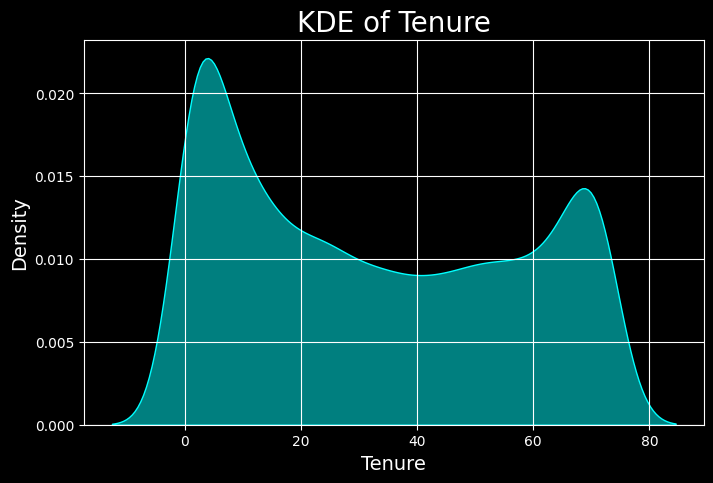

In [24]:
plt.style.use("dark_background")
plt.figure(figsize=(8, 5))
sns.kdeplot(data=churn_data['tenure'], color='cyan', fill=True, alpha = 0.5)
plt.title('KDE of Tenure', fontsize=20)
plt.xlabel('Tenure', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.grid(True)
plt.show()

In [25]:
churn_data['PhoneService'].value_counts().to_frame()

,count
PhoneService,
Yes,6361
No,682


In [26]:
churn_data.groupby(['Churn', 'PhoneService'])['Partner'].count()

Churn  PhoneService
No     No               512
       Yes             4662
Yes    No               170
       Yes             1699
Name: Partner, dtype: int64

In [27]:
churn_data.groupby(['gender', 'PhoneService'])['Partner'].count()

gender  PhoneService
Female  No               331
        Yes             3157
Male    No               351
        Yes             3204
Name: Partner, dtype: int64

In [28]:
fig = px.pie(churn_data, title="Phone Service Distro",names="PhoneService", color_discrete_sequence=px.colors.sequential.Plotly3)
fig.update_traces(hole=.5, hoverinfo="label+percent+name",textinfo='percent+label', textfont_size=16)
fig.update_layout(
    title_x=0.5,
    title_font=dict(size=20, color='orange'), 
    template="plotly_dark",  
    width=500,              
    height=500 
)
fig.add_annotation(
    text="Phone Service",
    showarrow=False,
    font=dict(size=20, color="orange"), 
    xref="paper", yref="paper",
    x=0.5, y=0.5 
)
fig.show()


In [29]:
PhoneService_churn_summary = churn_data.groupby(['PhoneService', 'Churn']).size().reset_index(name="Count")
PhoneService_gender_summary = churn_data.groupby(['PhoneService', 'gender']).size().reset_index(name="Count")

fig_PhoneService_churn = px.bar(PhoneService_churn_summary, 
             x='PhoneService', 
             y='Count', 
             color='Churn',
             text='Count',
             color_discrete_sequence=px.colors.sequential.haline)

fig_PhoneService_gender = px.bar(PhoneService_gender_summary, 
             x='PhoneService', 
             y='Count', 
             color='gender',
             text='Count',
             color_discrete_sequence=px.colors.sequential.haline_r)

fig = make_subplots(rows=1, cols=2)

for trace in fig_PhoneService_churn.data:
    fig.add_trace(trace, row=1, col=1)

for trace in fig_PhoneService_gender.data:
    fig.add_trace(trace, row=1, col=2)

fig.add_annotation(
    text="PhoneService vs. Churn",
    showarrow=False,
    font=dict(size=20, color="blue"), 
    xref="paper", yref="paper",
    x=.23, y=1, xanchor='center', yanchor='bottom'
)
fig.add_annotation(
    text="PhoneService vs. Gender",
    showarrow=False,
    font=dict(size=20, color="yellowgreen"), 
    xref="paper", yref="paper",
    x=.77, y=1, xanchor='center', yanchor='bottom'
)

fig.update_layout(
    title_text='Phone Service Distro Analysis',
    title_x=0.5,
    title_font=dict(size=20, color='mediumvioletred'),
    template="plotly_dark",
    width=1000,
    height=500
)

fig.show()

In [30]:
churn_data['MultipleLines'] = churn_data['MultipleLines'].apply(lambda x: "No" if x == 'No phone service' else x)

In [31]:
fig = px.pie(churn_data, title="Multiple Lines Distro",names="MultipleLines", color_discrete_sequence=px.colors.sequential.matter_r)
fig.update_traces(hole=.5, hoverinfo="label+percent+name",textinfo='percent+label', textfont_size=16)
fig.update_layout(
    title_x=0.5,
    title_font=dict(size=20, color='White'), 
    template="plotly_dark",  
    width=500,              
    height=500 
)
fig.add_annotation(
    text="Multiple Lines",
    showarrow=False,
    font=dict(size=20, color="White"), 
    xref="paper", yref="paper",
    x=0.5, y=0.5 
)
fig.show()


In [32]:
MultipleLines_churn_summary = churn_data.groupby(['MultipleLines', 'Churn']).size().reset_index(name="Count")

fig = px.bar(MultipleLines_churn_summary, 
             x='MultipleLines', 
             y='Count', 
             color='Churn', 
             title='Multiple Lines VS Churn',
             text='Count',
             color_discrete_sequence=px.colors.sequential.Purples_r)
fig.update_layout(
    title_x = 0.5, title_font = dict(size = 20, color = 'orange'),
    template = 'plotly_dark',  barmode='group', xaxis_title = 'Gender', yaxis_title = "Count", width = 500, height = 500
)
fig.show()

In [33]:
fig = px.pie(churn_data, title="Internet Service Distro",names="InternetService", color_discrete_sequence=px.colors.sequential.Emrld_r)
fig.update_traces(hole=.55, hoverinfo="label+percent+name",textinfo='percent+label', textfont_size=16)
fig.update_layout(
    title_x=0.5,
    title_font=dict(size=20, color='White'), 
    template="plotly_dark",  
    width=500,              
    height=500 
)
fig.add_annotation(
    text="Internet Service",
    showarrow=False,
    font=dict(size=20, color="White"), 
    xref="paper", yref="paper",
    x=0.5, y=0.5 
)
fig.show()


In [34]:
InternetService_churn_summary = churn_data.groupby(['InternetService', 'Churn']).size().reset_index(name="Count")

fig = px.bar(InternetService_churn_summary, 
             x='InternetService', 
             y='Count', 
             color='Churn', 
             title='Internet Service VS Churn',
             text='Count',
             color_discrete_sequence=px.colors.sequential.Viridis_r)
fig.update_layout(
    title_x = 0.5, title_font = dict(size = 20, color = 'yellowgreen'),
    template = 'plotly_dark',  barmode='group', xaxis_title = 'Internet Service', yaxis_title = "Count", width = 500, height = 500
)
fig.show()

In [35]:
churn_data['OnlineSecurity'] = churn_data['OnlineSecurity'].apply(lambda x: "No" if x == 'No internet service' else x)

In [36]:
fig = px.pie(churn_data, title="Online Security Distro",names="OnlineSecurity", color_discrete_sequence=px.colors.sequential.Agsunset)
fig.update_traces(hole=.5, hoverinfo="label+percent+name",textinfo='percent+label', textfont_size=16)
fig.update_layout(
    title_x=0.5,
    title_font=dict(size=20, color='White'), 
    template="plotly_dark",  
    width=500,              
    height=500 
)
fig.add_annotation(
    text="Security",
    showarrow=False,
    font=dict(size=20, color="White"), 
    xref="paper", yref="paper",
    x=0.5, y=0.5 
)
fig.show()


In [37]:
OnlineSecurity_churn_summary = churn_data.groupby(['OnlineSecurity', 'Churn']).size().reset_index(name="Count")

fig = px.bar(OnlineSecurity_churn_summary, 
             x='OnlineSecurity', 
             y='Count', 
             color='Churn', 
             title='Online Security VS Churn',
             text='Count',
             color_discrete_sequence=px.colors.sequential.YlOrRd_r)
fig.update_layout(
    title_x = 0.5, title_font = dict(size = 20, color = 'red'),
    template = 'plotly_dark',  barmode='group', xaxis_title = 'Online Security', yaxis_title = "Count", width = 500, height = 500
)
fig.show()

In [38]:
churn_data['OnlineBackup'] = churn_data['OnlineBackup'].apply(lambda x: "No" if x == 'No internet service' else x)

In [39]:
fig = px.pie(churn_data, title="Online Backup Distro",names="OnlineBackup", color_discrete_sequence=px.colors.sequential.Aggrnyl_r)
fig.update_traces(hole=.5, hoverinfo="label+percent+name",textinfo='percent+label', textfont_size=16)
fig.update_layout(
    title_x=0.5,
    title_font=dict(size=20, color='mediumspringgreen'), 
    template="plotly_dark",  
    width=500,              
    height=500 
)
fig.add_annotation(
    text="Backup",
    showarrow=False,
    font=dict(size=20, color="mediumspringgreen"), 
    xref="paper", yref="paper",
    x=0.5, y=0.5 
)
fig.show()


In [40]:
OnlineBackup_churn_summary = churn_data.groupby(['OnlineBackup', 'Churn']).size().reset_index(name="Count")

fig = px.bar(OnlineBackup_churn_summary, 
             x='OnlineBackup', 
             y='Count', 
             color='Churn', 
             title='Online Backup VS Churn',
             text='Count',
             color_discrete_sequence=px.colors.sequential.YlGnBu_r)
fig.update_layout(
    title_x = 0.5, title_font = dict(size = 20, color = 'darkblue'),
    template = 'plotly_dark',  barmode='group', xaxis_title = 'Online Backup', yaxis_title = "Count", width = 500, height = 500
)
fig.show()

In [41]:
churn_data['DeviceProtection'] = churn_data['DeviceProtection'].apply(lambda x: "No" if x == 'No internet service' else x)

In [42]:
fig = px.pie(churn_data, title="Device Protection Distro",names="DeviceProtection", color_discrete_sequence=px.colors.sequential.Bluyl_r)
fig.update_traces(hole=.5, hoverinfo="label+percent+name",textinfo='percent+label', textfont_size=16)
fig.update_layout(
    title_x=0.5,
    title_font=dict(size=20, color='dodgerblue'), 
    template="plotly_dark",  
    width=500,              
    height=500 
)
fig.add_annotation(
    text="Backup",
    showarrow=False,
    font=dict(size=20, color="dodgerblue"), 
    xref="paper", yref="paper",
    x=0.5, y=0.5 
)
fig.show()


In [43]:
DeviceProtection_churn_summary = churn_data.groupby(['DeviceProtection', 'Churn']).size().reset_index(name="Count")

fig = px.bar(DeviceProtection_churn_summary, 
             x='DeviceProtection', 
             y='Count', 
             color='Churn', 
             title='Device Protection VS Churn',
             text='Count',
             color_discrete_sequence=px.colors.sequential.PuBuGn_r)
fig.update_layout(
    title_x = 0.5, title_font = dict(size = 20, color = 'springgreen'),
    template = 'plotly_dark',  barmode='group', xaxis_title = 'Device Protection', yaxis_title = "Count", width = 500, height = 500
)
fig.show()

In [44]:
churn_data['TechSupport'] = churn_data['TechSupport'].apply(lambda x: "No" if x == 'No internet service' else x)

In [45]:
fig = px.pie(churn_data, title="Tech Support Distro",names="TechSupport", color_discrete_sequence=px.colors.sequential.RdPu_r)
fig.update_traces(hole=.5, hoverinfo="label+percent+name",textinfo='percent+label', textfont_size=16)
fig.update_layout(
    title_x=0.5,
    title_font=dict(size=20, color='hotpink'), 
    template="plotly_dark",  
    width=500,              
    height=500 
)
fig.add_annotation(
    text="Support",
    showarrow=False,
    font=dict(size=20, color="hotpink"), 
    xref="paper", yref="paper",
    x=0.5, y=0.5 
)
fig.show()


In [46]:
TechSupport_churn_summary = churn_data.groupby(['TechSupport', 'Churn']).size().reset_index(name="Count")

fig = px.bar(TechSupport_churn_summary, 
             x='TechSupport', 
             y='Count', 
             color='Churn', 
             title='Tech Support VS Churn',
             text='Count',
             color_discrete_sequence=px.colors.sequential.PuBu_r)
fig.update_layout(
    title_x = 0.5, title_font = dict(size = 20, color = 'deepskyblue'),
    template = 'plotly_dark',  barmode='group', xaxis_title = 'Tech Support', yaxis_title = "Count", width = 500, height = 500
)
fig.show()

In [47]:
churn_data['StreamingTV'] = churn_data['StreamingTV'].apply(lambda x: "No" if x == 'No internet service' else x)
churn_data['StreamingMovies'] = churn_data['StreamingMovies'].apply(lambda x: "No" if x == 'No internet service' else x)

In [48]:
fig = px.pie(churn_data, title="Streaming TV Distro",names="StreamingTV", color_discrete_sequence=px.colors.sequential.Cividis)
fig.update_traces(hole=.5, hoverinfo="label+percent+name",textinfo='percent+label', textfont_size=16)
fig.update_layout(
    title_x=0.5,
    title_font=dict(size=20, color='blue'), 
    template="plotly_dark",  
    width=500,              
    height=500 
)
fig.add_annotation(
    text="Streaming",
    showarrow=False,
    font=dict(size=20, color="blue"), 
    xref="paper", yref="paper",
    x=0.5, y=0.5 
)
fig.show()


In [49]:
StreamingTV_churn_summary = churn_data.groupby(['StreamingTV', 'Churn']).size().reset_index(name="Count")

fig = px.bar(StreamingTV_churn_summary, 
             x='StreamingTV', 
             y='Count', 
             color='Churn', 
             title='Streaming TV VS Churn',
             text='Count',
             color_discrete_sequence=px.colors.sequential.Blugrn_r)
fig.update_layout(
    title_x = 0.5, title_font = dict(size = 20, color = 'lightgoldenrodyellow'),
    template = 'plotly_dark',  barmode='group', xaxis_title = 'Streaming TV', yaxis_title = "Count", width = 500, height = 500
)
fig.show()

In [50]:
fig = px.pie(churn_data, title="Contract Distro",names="Contract", color_discrete_sequence=px.colors.sequential.Cividis)
fig.update_traces(hole=.5, hoverinfo="label+percent+name",textinfo='percent+label', textfont_size=16)
fig.update_layout(
    title_x=0.5,
    title_font=dict(size=20, color='deepskyblue'), 
    template="plotly_dark",  
    width=500,              
    height=500 
)
fig.add_annotation(
    text="Contract",
    showarrow=False,
    font=dict(size=20, color="deepskyblue"), 
    xref="paper", yref="paper",
    x=0.5, y=0.5 
)
fig.show()


In [51]:
Contract_churn_summary = churn_data.groupby(['Contract', 'Churn']).size().reset_index(name="Count")

fig = px.bar(Contract_churn_summary, 
             x='Contract', 
             y='Count', 
             color='Churn', 
             title='Contract VS Churn',
             text='Count',
             color_discrete_sequence=px.colors.sequential.Brwnyl_r)
fig.update_layout(
    title_x = 0.5, title_font = dict(size = 20, color = 'cornsilk'),
    template = 'plotly_dark',  barmode='group', xaxis_title = 'Contract', yaxis_title = "Count", width = 500, height = 500
)
fig.show()

In [52]:
fig = px.pie(churn_data, title="Paperless Billing Distro",names="PaperlessBilling", color_discrete_sequence=px.colors.sequential.Cividis)
fig.update_traces(hole=.5, hoverinfo="label+percent+name",textinfo='percent+label', textfont_size=16)
fig.update_layout(
    title_x=0.5,
    title_font=dict(size=20, color='deepskyblue'), 
    template="plotly_dark",  
    width=500,              
    height=500 
)
fig.add_annotation(
    text="Billing",
    showarrow=False,
    font=dict(size=20, color="deepskyblue"), 
    xref="paper", yref="paper",
    x=0.5, y=0.5 
)
fig.show()


In [53]:
PaperlessBilling_churn_summary = churn_data.groupby(['PaperlessBilling', 'Churn']).size().reset_index(name="Count")

fig = px.bar(PaperlessBilling_churn_summary, 
             x='PaperlessBilling', 
             y='Count', 
             color='Churn', 
             title='Paperless Billing VS Churn',
             text='Count',
             color_discrete_sequence=px.colors.sequential.Reds_r)
fig.update_layout(
    title_x = 0.5, title_font = dict(size = 20, color = 'red'),
    template = 'plotly_dark',  barmode='group', xaxis_title = 'Paperless Billing', yaxis_title = "Count", width = 500, height = 500
)
fig.show()

In [54]:
fig = px.pie(churn_data, title="Payment Method Distribution",names="PaymentMethod", color_discrete_sequence=px.colors.sequential.Oryel_r)
fig.update_traces(hole=.5, hoverinfo="label+percent+name",textinfo='percent+label', textfont_size=16)
fig.update_layout(
    title_x=0.5,
    title_font=dict(size=20, color='tomato'),
    template="plotly_dark",  
    width=700,              
    height=500 
)
fig.add_annotation(
    text="Payment",
    showarrow=False,
    font=dict(size=20, color="tomato"), 
    xref="paper", yref="paper",
    x=0.5, y=0.5 
)
fig.show()

In [55]:
PaymentMethod_churn_summary = churn_data.groupby(['PaymentMethod', 'Churn']).size().reset_index(name="Count")

fig = px.bar(PaymentMethod_churn_summary, 
             x='PaymentMethod', 
             y='Count', 
             color='Churn', 
             title='Payment Method VS Churn',
             text='Count',
             color_discrete_sequence=px.colors.sequential.Magenta_r)
fig.update_layout(
    title_x = 0.5, title_font = dict(size = 20, color = 'aquamarine'),
    template = 'plotly_dark',  barmode='group', xaxis_title = 'Payment Method', yaxis_title = "Count", width = 500, height = 500
)
fig.show()

In [56]:
fig = px.box(
    churn_data, y='MonthlyCharges', title="Monthly Charges Distribution", color_discrete_sequence=px.colors.sequential.RdBu
)
fig.update_layout(
    title_x=0.5,
    title_font=dict(size=20, color='red'), 
    template="plotly_dark",  
    width=500,              
    height=500 
)
fig.add_annotation(
    text="Charges",
    showarrow=False,
    font=dict(size=20, color="red"), 
    xref="paper", yref="paper",
    x=0.5, y=0.5 
)
fig.show()

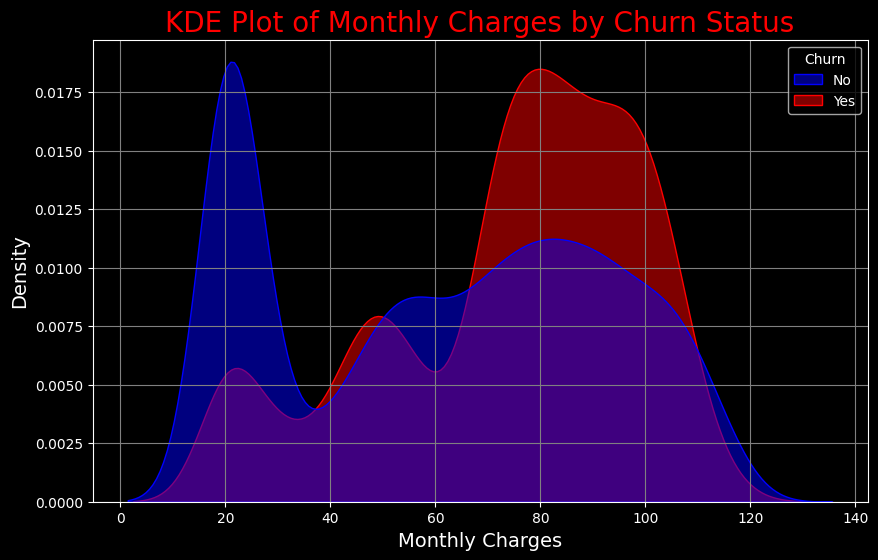

In [57]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=churn_data, x='MonthlyCharges', hue='Churn', 
             fill=True, common_norm=False,
             palette={'Yes': 'red', 'No': 'blue'},
             alpha=0.5)
plt.title('KDE Plot of Monthly Charges by Churn Status', fontsize=20, color='red')
plt.xlabel('Monthly Charges', fontsize=14, color='white')
plt.ylabel('Density', fontsize=14, color='white')
plt.grid(True, color='gray')
plt.show()

In [58]:
fig = px.box(
    churn_data, y='TotalCharges', title="Total Charges Distribution", color_discrete_sequence=px.colors.sequential.Jet_r
)
fig.update_layout(
    title_x=0.5,
    title_font=dict(size=20, color='darkorange'), 
    template="plotly_dark",  
    width=500,              
    height=500 
)
fig.add_annotation(
    text="Charges",
    showarrow=False,
    font=dict(size=20, color="darkorange"), 
    xref="paper", yref="paper",
    x=0.5, y=0.5 
)
fig.show()

In [59]:
churn_data = churn_data[churn_data['TotalCharges'] != " "]
churn_data['TotalCharges'] = churn_data['TotalCharges'].astype(float)

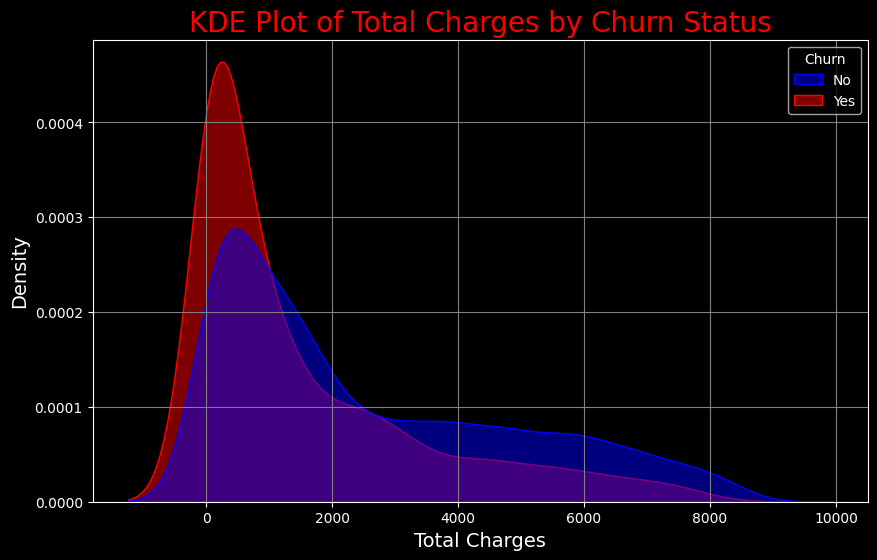

In [60]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=churn_data, x='TotalCharges', hue='Churn', 
             fill=True, common_norm=False,
             palette={'Yes': 'red', 'No': 'blue'},
             alpha=0.5)
plt.title('KDE Plot of Total Charges by Churn Status', fontsize=20, color='red')
plt.xlabel('Total Charges', fontsize=14, color='white')
plt.ylabel('Density', fontsize=14, color='white')
plt.grid(True, color='gray')
plt.show()

In [61]:
fig = px.pie(churn_data, title="Churn Distribution",names="Churn", color_discrete_sequence=px.colors.sequential.Oryel_r)
fig.update_traces(hole=.5, hoverinfo="label+percent+name",textinfo='percent+label', textfont_size=16)
fig.update_layout(
    title_x=0.5,
    title_font=dict(size=20, color='tomato'),
    template="plotly_dark",  
    width=700,              
    height=500 
)
fig.add_annotation(
    text="Churn",
    showarrow=False,
    font=dict(size=20, color="tomato"), 
    xref="paper", yref="paper",
    x=0.5, y=0.5 
)
fig.show()

In [62]:
total_monthly_churn_summary = churn_data.groupby(['Churn'])[['MonthlyCharges', 'TotalCharges']].sum().reset_index()

fig = px.bar(total_monthly_churn_summary, 
             x='Churn', 
             y=['MonthlyCharges', 'TotalCharges'],
             title='Total vs. Monthly Charges by Churn Status',
             text_auto=True,
             color_discrete_sequence=px.colors.sequential.Blugrn_r)

fig.update_layout(
    title_x=0.5, title_font=dict(size=20, color='aquamarine'),
    template='plotly_dark', barmode='group', 
    xaxis_title='Churn Status', yaxis_title="Charges", width=1000, height=500
)

fig.show()


**<a id="2"></a>
<h1><b><p style="background-image: url(https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.simplilearn.com%2Fdata-science-vs-big-data-vs-data-analytics-article&psig=AOvVaw2SjVr5BUJ7TwooF9Qn76Tn&ust=1730193676764000&source=images&cd=vfe&opi=89978449&ved=0CBQQjRxqFwoTCLiQ7-zfsIkDFQAAAAAdAAAAABAE);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Preprocessing</p></b></h1>

In [63]:
churn_data.drop(columns=['customerID'], inplace=True)

In [64]:
mapping = {
    'Yes':1,
    'No': 0
}
gender_mapping = {
    'Male': 1, "Female":0
}

In [65]:
yes_no_cols = churn_data[['Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'Churn']]
for col in yes_no_cols:
    churn_data[col] = churn_data[col].map(mapping)

In [66]:
churn_data['gender'] = churn_data['gender'].map(gender_mapping)

In [67]:
encode_cols = churn_data[['InternetService', 'Contract', 'PaymentMethod']]

In [68]:
le = LabelEncoder()

In [69]:
for col in encode_cols:
    churn_data[col] = le.fit_transform(churn_data[col])

In [70]:
too_be_scaling = churn_data[['tenure', 'MonthlyCharges', 'TotalCharges']].columns

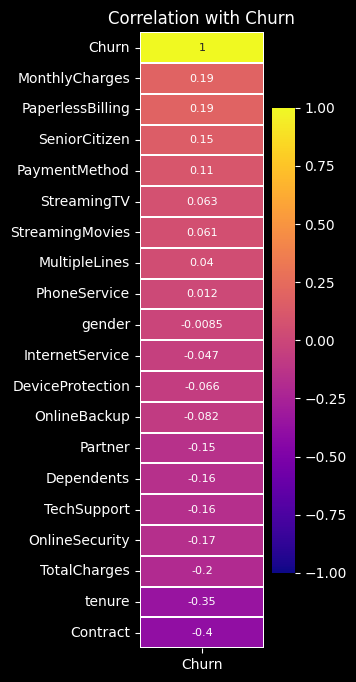

In [71]:
churn_corr = churn_data.corr()[['Churn']].sort_values(by='Churn', ascending=False)

plt.figure(figsize=(2, 8))
sns.heatmap(churn_corr, vmax=1, vmin=-1, cmap='plasma', annot=True, annot_kws={"size": 8}, linewidths=0.1)
plt.title("Correlation with Churn")
plt.show()

**<a id="2"></a>
<h1><b><p style="background-image: url(https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.simplilearn.com%2Fdata-science-vs-big-data-vs-data-analytics-article&psig=AOvVaw2SjVr5BUJ7TwooF9Qn76Tn&ust=1730193676764000&source=images&cd=vfe&opi=89978449&ved=0CBQQjRxqFwoTCLiQ7-zfsIkDFQAAAAAdAAAAABAE);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">ML Models</p></b></h1>

In [72]:
X = churn_data.drop(columns=['Churn', 'OnlineBackup', 'DeviceProtection', 'InternetService', 'gender', 'PhoneService', 'MultipleLines', 'StreamingMovies', 'StreamingTV'])
y = churn_data['Churn']

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [74]:
smote_enn = SMOTEENN()
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

In [75]:
X_train_en, X_test_en, y_train_en, y_test_en = train_test_split(X_resampled, y_resampled,test_size=0.2)

In [76]:
model_dt_smote=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)
model_dt_smote.fit(X_train_en, y_train_en)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [77]:
print(classification_report(y_true=y_test_en, y_pred=model_dt_smote.predict(X_test_en)))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       548
           1       0.92      0.96      0.94       594

    accuracy                           0.93      1142
   macro avg       0.94      0.93      0.93      1142
weighted avg       0.94      0.93      0.93      1142



Confusion Matrix is : 
 [[498  50]
 [ 25 569]]


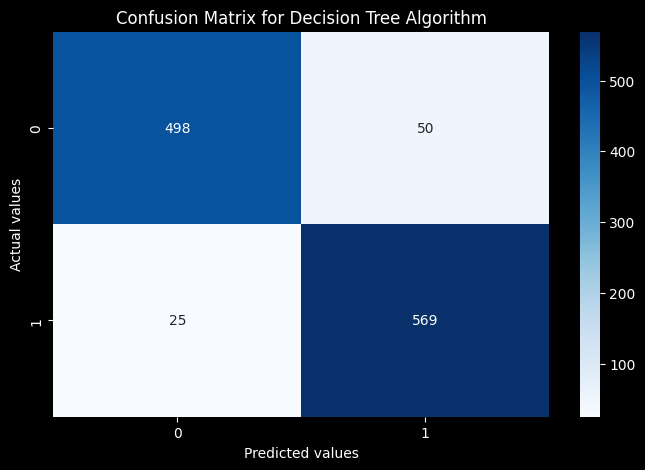

In [78]:
CM = confusion_matrix(y_test_en, model_dt_smote.predict(X_test_en))
print('Confusion Matrix is : \n', CM)
plt.figure(figsize=(8,5))
sns.heatmap(data=CM, annot=True,fmt='g', cmap="Blues")
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title(f'Confusion Matrix for Decision Tree Algorithm')
plt.show()

In [79]:
model_rf = RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)
model_rf.fit(X_train_en, y_train_en)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [80]:
print(classification_report(y_true=y_test_en, y_pred=model_dt_smote.predict(X_test_en)))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       548
           1       0.92      0.96      0.94       594

    accuracy                           0.93      1142
   macro avg       0.94      0.93      0.93      1142
weighted avg       0.94      0.93      0.93      1142



Confusion Matrix is : 
 [[501  47]
 [ 28 566]]


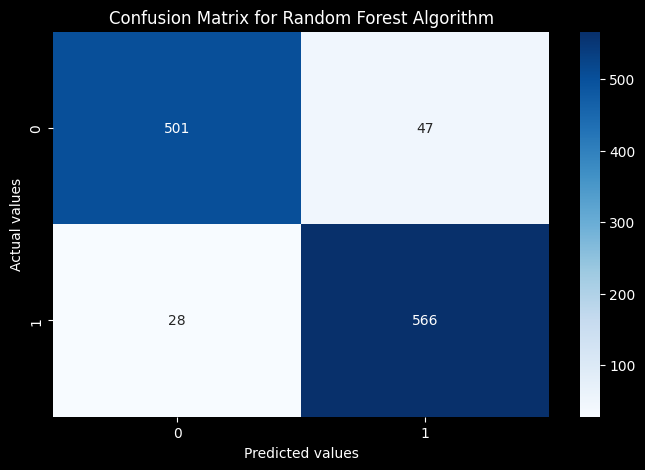

In [81]:
CM = confusion_matrix(y_test_en, model_rf.predict(X_test_en))
print('Confusion Matrix is : \n', CM)
plt.figure(figsize=(8,5))
sns.heatmap(data=CM, annot=True,fmt='g', cmap="Blues")
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title(f'Confusion Matrix for Random Forest Algorithm')
plt.show()

In [86]:
Models(X_train_en, X_test_en, y_train_en, y_test_en, 0.2, False)

,Model,F1 Score,Training Accuracy,Testing Accuracy,Best Parameters
0,Logistic Regression,0.920816,0.925537,0.915061,NaN
1,Support Vector Classifier,0.793867,0.789312,0.788091,NaN
2,Decision Tree Classifier,0.944490,1.000000,0.941331,NaN
3,Random Forest Classifier,0.956449,1.000000,0.954466,NaN


In [87]:
Models(X_train_en, X_test_en, y_train_en, y_test_en, 0.2, True)

,Model,F1 Score,Training Accuracy,Testing Accuracy,Best Parameters
0,Decision Tree Classifier,0.949039,0.999781,0.946585,"{'criterion': 'entropy', 'max_depth': 20, 'min..."
1,Random Forest Classifier,0.960801,1.0,0.958844,"{'criterion': 'gini', 'max_depth': None, 'min_..."


**<a id="1"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Step 3: Add Simulated NLP Features
</p></b></h1>

In [874]:
positive_feedback_samples = [
    "Happy with the consistent service over the years.",
    "Tech support was very helpful when I needed assistance.",
    "Online security features have given me peace of mind.",
    "I appreciate the flexible contract options.",
    "Billing is seamless with paperless billing.",
    "Enjoying affordable rates and stable monthly charges.",
    "Great service with no interruptions during my tenure.",
    "Partnered plan has been cost-effective and reliable.",
    "Dependents also use the service with no issues.",
    "Satisfied with the support offered by tech specialists.",
    "Good monthly rates and easy-to-understand billing.",
    "Online security features meet my needs well.",
    "Easy setup and reliable network with no drops.",
    "Flexible contract terms suit my needs perfectly.",
    "Tech support has been quick and effective every time.",
    "Clear billing process with no surprise charges.",
    "Tenure discounts made staying with this provider easy.",
    "The partner-friendly plans fit our budget well.",
    "Online security features keep my data safe.",
    "Smooth billing system with paperless convenience.",
    "Great experience with minimal downtime.",
    "Monthly charges are reasonable for the service.",
    "Dependents find the network reliable and fast.",
    "Tenure discounts make the service worth it.",
    "Happy with the package offered for my household.",
    "Online security is a great added feature.",
    "Helpful tech support, available when needed.",
    "Partner and dependents also satisfied with the plan.",
    "Reliable monthly charges and no unexpected fees.",
    "Flexible contracts that fit my lifestyle.",
    "The tech support team is quick and professional.",
    "Enjoying good service quality over the years.",
    "Paperless billing is convenient and eco-friendly.",
    "Stable and affordable service throughout my tenure.",
    "The support team made the setup process smooth."
]
negative_feedback_samples = [
    "Frequent billing issues make the service frustrating.",
    "Tech support often fails to resolve issues effectively.",
    "Online security seems inadequate compared to others.",
    "Contract terms feel rigid and hard to adjust.",
    "Paperless billing errors are too common.",
    "Monthly charges have unexpected increases frequently.",
    "Service quality drops significantly during peak hours.",
    "Partnered plan lacks sufficient network stability.",
    "Dependents report frequent service interruptions.",
    "Tech support response times are too slow.",
    "The online security features feel minimal.",
    "The billing system is often confusing and inaccurate.",
    "Frequent outages even after being a long-term customer.",
    "Support team rarely resolves issues in one call.",
    "Contract renewal terms lack flexibility.",
    "Monthly charges feel high for the service provided.",
    "Online security lags compared to competitors.",
    "Billing statements are often unclear or incorrect.",
    "Tenure discounts were not applied as promised.",
    "Dependents face frequent network drops.",
    "Technical support often leaves issues unresolved.",
    "Monthly billing errors are a common occurrence.",
    "Frequent contract changes without notice.",
    "Partnered plan does not seem cost-effective anymore.",
    "Issues with online security features persisting.",
    "Tech support is not helpful during peak times.",
    "Paperless billing fails to capture accurate details.",
    "High charges without any added benefits.",
    "Contract terms do not accommodate long-term customers.",
    "Monthly charges are inconsistent and unpredictable.",
    "Frequent network issues during peak usage.",
    "Partner and dependents also dissatisfied with service.",
    "Tech support rarely resolves issues promptly.",
    "Dependents complain of frequent disconnections."
]

In [776]:
churn_data_new = pd.concat([X, y], axis=1)

In [779]:
np.random.seed(0)  #'Yes':1,'No': 0
churn_data_new['customer_feedback'] = churn_data_new['Churn'].apply(
    lambda x: np.random.choice(negative_feedback_samples) if x == 1 else np.random.choice(positive_feedback_samples)
)